علی اکبر احراری- 4003613001

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه 
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این پروژه می‌خواهیم به پیش‌بینی محدودیت اعتباری برای مشتریان بر اساس اطلاعات جمعیتی و مالی آن‌ها بپردازیم. برای این کار، نیاز به برداشتن سلسله گام‌هایی می‌باشد که به ارائه دقیق آن‌ها می‌پردازم.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تعریف مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>همانطور که اشاره شد، مسئله، پیش‌بینی محدودیت اعتباری برای مشتریان با استفاده از ویژگی‌های جمعیتی و مالی آن‌ها می‌باشد. همچنین که معیار و نشان دهنده میزان موفقیت ما در این مسئله، دستیابی به یک سطح معین از دقت در پیش‌بینی محدودیت اعتباری است.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در ابتدا به وارد کردن کتابخانه های مورد نیاز در این پروژه می پردازیم
</font>
</p>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
گام نخست این مسأله، خواندن اطلاعات از روی فایل" CreditPrediction.csv" که آن را در فولدر /data/ قرار داده‌ایم می‌باشد. برای راحتی بیشتر از کتابخانه pandas و دستور pd.read_csv() استفاده می‌کنیم و یک دیتافریم تشکیل می‌دهیم. این به ما امکان می‌دهد که به سادگی داده را شخصی سازی کرده و عملیاتی مانند فیلتر کردن، مرتب کردن، و گروه‌بندی را انجام دهیم. </font>
</p>

In [2]:
data = pd.read_csv('data/CreditPrediction.csv')
type(data)

pandas.core.frame.DataFrame

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
	حال می‌توانیم با استفاده از دستور head()، 5 سطر اول این دیتافریم را بخوانیم.
</font>
</p>


In [3]:
data.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 19
0,768805383,45.0,M,3,High School,Married,$60K - $80K,Blue,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061,NaN
1,818770008,49.0,F,5,Graduate,NaN,Less than $40K,Blue,44.0,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105,NaN
2,713982108,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000,NaN
3,769911858,40.0,F,4,High School,NaN,Less than $40K,Blue,34.0,3.0,4,1,3313.0,2517,1.405,1171,20,2.333,0.760,NaN
4,709106358,40.0,M,3,Uneducated,Married,$60K - $80K,NaN,21.0,5.0,1,0,4716.0,0,2.175,816,28,2.500,0.000,NaN


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش پردازش داده ها
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این مرحله به آماده سازی داده ها جهت تحویل آنها به مدل و ادامه فرایند ساخت مدل می پردازیم.
پیش پردازش داده ها تشکیل می شود از: 
مراحل پاکسازی داده: مدیریت مقادیر گم‌شده، حذف داده‌های تکراری و اصلاح ناسازگاری‌ها
تکنیک‌های مهندسی ویژگی: تبدیل متغیرهای زبانه‌ای به نمایش‌های عددی، مقیاس‌بندی ویژگی‌های عددی
روش‌های نرمال‌سازی/استانداردسازی استفاده شده: مقیاس‌بندی ویژگی‌ها به یک دامنه یا توزیع مشترک
</font>
</p>


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10167 non-null  int64  
 1   Customer_Age              10167 non-null  float64
 2   Gender                    9968 non-null   object 
 3   Dependent_count           10167 non-null  int64  
 4   Education_Level           10167 non-null  object 
 5   Marital_Status            8217 non-null   object 
 6   Income_Category           10167 non-null  object 
 7   Card_Category             8243 non-null   object 
 8   Months_on_book            9944 non-null   float64
 9   Total_Relationship_Count  10147 non-null  float64
 10  Months_Inactive_12_mon    10167 non-null  int64  
 11  Contacts_Count_12_mon     10167 non-null  int64  
 12  Credit_Limit              10167 non-null  float64
 13  Total_Revolving_Bal       10167 non-null  int64  
 14  Total_

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
کار خود را با داده های گمشده آغاز می کنیم
</font>
</p>


In [5]:
data.isnull().sum()

CLIENTNUM                       0
Customer_Age                    0
Gender                        199
Dependent_count                 0
Education_Level                 0
Marital_Status               1950
Income_Category                 0
Card_Category                1924
Months_on_book                223
Total_Relationship_Count       20
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Credit_Limit                    0
Total_Revolving_Bal             0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Trans_Ct                  0
Total_Ct_Chng_Q4_Q1             0
Avg_Utilization_Ratio           0
Unnamed: 19                 10167
dtype: int64

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
حال با توجه به تعداد داده های گمشده هر ویژگی می توان تصمیم مختلفی برای آن گرفت.
به عنوان مثال در قطعه کد بعدی، کلاس هایی که بیش از 90 درصدشان خالی است را مشخص و حذف می کنیم.
</font>
</p>


In [6]:
missing_percentages = data.isnull().mean()
column_to_delete = missing_percentages[missing_percentages > 0.9].index
print(column_to_delete)

Index(['Unnamed: 19'], dtype='object')


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
کلاس clientnum که حاوی شماره آیدی مشتریان است، ارتباط خاصی با کلاس هدف ندارد پس می توانیم آن را در ابتدا حذف کنیم
</font>
</p>


In [7]:
data.drop(columns = ['Unnamed: 19', 'CLIENTNUM'], inplace = True)

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
برای کلاس Gender این سیاست را درنظر می گیریم که مقدار های خالی را با مد این کلاس پر می کنیم.(به دلیل حجم گمشده کم این دیتا)</font>
</p>


In [8]:
# Calculate the mode (most frequent category) of the "Gender" column
mode_gender = data['Gender'].mode().iloc[0]

# Fill missing values with the mode
data['Gender'] = data['Gender'].fillna(mode_gender)

In [9]:
print(data['Marital_Status'].value_counts())

Married     3808
Single      3192
Unknown      621
Divorced     596
Name: Marital_Status, dtype: int64


In [10]:
mode_Marital_Status = data['Marital_Status'].mode()[0]
data['Marital_Status'] = data['Marital_Status'].fillna(mode_Marital_Status)

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
مقادیر Unknown را باید مدیریت کرد و در آینده به آن می پردازیم
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
متغیر بعدی که باید در نظر گرفت card_category می باشد. ابتدا مقادیری که می تواند بگیرد را بررسی می کنیم
</font>
</p>


In [11]:
data['Card_Category'].unique()

array(['Blue', nan, 'Gold', 'Silver', 'Platinum'], dtype=object)

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
حال می توانیم با پر کردن مقادیر آن به وسیله مد، آنها را پر کنیم.
</font>
</p>


In [12]:
mode_Card_Category = data['Card_Category'].mode()[0]
data['Card_Category'].fillna(mode_Card_Category, inplace=True)

In [13]:
mode_Total_Relationship_Count = data['Total_Relationship_Count'].mode().iloc[0]
data['Total_Relationship_Count'] = data['Total_Relationship_Count'].fillna(mode_Total_Relationship_Count)

In [14]:
mode_Months_on_book = data['Months_on_book'].mode().iloc[0]
data['Months_on_book'] = data['Months_on_book'].fillna(mode_Months_on_book)

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
حال، به عوض کردن مقادیر unknown با مد هریک از ویژگی ها می پردازیم.
</font>
</p>


In [15]:
# Calculate the mode (most frequent category) of the "Gender" column
mode_Education_Level = data['Education_Level'].mode().iloc[0]

data['Education_Level'] = data['Education_Level'].replace('Unknown', mode_Education_Level)

In [16]:
count = np.count_nonzero(data['Income_Category'] == 'Unknown')

print(f"Count of values in Column Income_Category: {count}")    

Count of values in Column Income_Category: 1122


In [17]:
# Calculate the mode (most frequent category) of the "Gender" column
mode_Income_Category = data['Income_Category'].mode().iloc[0]

data['Income_Category'] = data['Income_Category'].replace('Unknown', mode_Income_Category)

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
می توانیم تغییرات ایجاد شده را مشاهده کنیم
</font>
</p>

In [18]:
data.isnull().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
داده های دسته ای
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
نیاز است داده های دسته ای که به دو صورت اسمی و ترتیبی می باشند را با الگوریتم های مناسب به متغیر هایی عددی تبدیل کنیم. تفاوت این دو در آنجاست که در داده های اسمی، تنها اسم ها فرق می کنند و نمیتوانیم در بزرگی یک مقدار بر دیگری نظر دهیم. اما در متغیر های ترتیبی، می توانیم اینکار را با انتصاب مقادیر دلخواه ایجاد کنیم.
</font>
</p>

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10167 non-null  float64
 1   Gender                    10167 non-null  object 
 2   Dependent_count           10167 non-null  int64  
 3   Education_Level           10167 non-null  object 
 4   Marital_Status            10167 non-null  object 
 5   Income_Category           10167 non-null  object 
 6   Card_Category             10167 non-null  object 
 7   Months_on_book            10167 non-null  float64
 8   Total_Relationship_Count  10167 non-null  float64
 9   Months_Inactive_12_mon    10167 non-null  int64  
 10  Contacts_Count_12_mon     10167 non-null  int64  
 11  Credit_Limit              10167 non-null  float64
 12  Total_Revolving_Bal       10167 non-null  int64  
 13  Total_Amt_Chng_Q4_Q1      10167 non-null  float64
 14  Total_

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
مشاهده می شود که مقادیر زیادی از این دیتافریم عددی نیستند(object)
</font>
</p>

In [20]:
data.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000,10167.000000
mean,46.753817,2.346513,35.915314,3.811646,2.341595,2.455887,8632.552346,1162.176748,0.759721,4402.349661,64.864463,0.712192,0.274716
std,13.520505,1.298701,7.892102,1.553629,1.010502,1.105580,9087.333842,815.082643,0.219054,3393.953441,23.461680,0.237934,0.275638
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,32.000000,3.000000,2.000000,2.000000,2556.500000,348.500000,0.631000,2155.500000,45.000000,0.582000,0.022000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,0.736000,3900.000000,67.000000,0.702000,0.175000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1783.000000,0.859000,4740.000000,81.000000,0.818000,0.502500
max,352.330517,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
ابتدا مقادیری که کلاس اسمی gender می تواند بگیرد را در نظر می گیریم. در اینجا، این کلاس تنها می تواند 2 مقدار داشته باشد. می توان با استفاده از دستور get_dummies() این داده را به روش one-hot-encoding به متغیری قابل تحلیل کرد برای Marital_Status هم به همین شکل.
</font>
</p>

In [21]:
data['Gender'].unique()

array(['M', 'F'], dtype=object)

In [22]:
data['Marital_Status'].unique()

array(['Married', 'Unknown', 'Single', 'Divorced'], dtype=object)

In [23]:
data = pd.get_dummies(columns=['Gender','Marital_Status'], data=data)

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
برای کلاس Educational_Levelو باقی کلاس های بعدی، به دلیل وجود ماهیتی ترتیبی بین آنها می توانیم آن ها را با استفاده از map به مقادیری دلخواه انتصاب دهیم
</font>
</p>

In [24]:
for column in ['Education_Level']:
    print(data[column].unique().__str__())

['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']


In [25]:
for column in ['Income_Category']:
    print(data[column].unique().__str__())

['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +']


In [26]:
for column in ['Card_Category']:
    print(data[column].unique().__str__())

['Blue' 'Gold' 'Silver' 'Platinum']


In [27]:
Education_Level_map = {'High School': 1, 'Graduate': 3, 'Uneducated': 0,  'College': 2, 'Post-Graduate': 4,
 'Doctorate': 5}
data['Education_Level'] = data['Education_Level'].map(Education_Level_map)

In [28]:
Income_Category_map = {'$60K - $80K': 2, 'Less than $40K': 0, '$80K - $120K': 3, '$40K - $60K': 1, '$120K +': 4}
data['Income_Category'] = data['Income_Category'].map(Income_Category_map)

In [29]:
Card_Category_map = {'Blue':0, 'Gold': 2, 'Silver': 3, 'Platinum': 4}
data['Card_Category'] = data['Card_Category'].map(Card_Category_map)

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
می توانیم تغییرات را مشاهده کنیم
</font>
</p>

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10167 non-null  float64
 1   Dependent_count           10167 non-null  int64  
 2   Education_Level           10167 non-null  int64  
 3   Income_Category           10167 non-null  int64  
 4   Card_Category             10167 non-null  int64  
 5   Months_on_book            10167 non-null  float64
 6   Total_Relationship_Count  10167 non-null  float64
 7   Months_Inactive_12_mon    10167 non-null  int64  
 8   Contacts_Count_12_mon     10167 non-null  int64  
 9   Credit_Limit              10167 non-null  float64
 10  Total_Revolving_Bal       10167 non-null  int64  
 11  Total_Amt_Chng_Q4_Q1      10167 non-null  float64
 12  Total_Trans_Amt           10167 non-null  int64  
 13  Total_Trans_Ct            10167 non-null  int64  
 14  Total_

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
حذف داده های پرت
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
با حذف داده های پرت از نوسان مدل در پیشبینی داده های جدید جلوگیری می کنیم. به عنوان مثال، با بررسی بیشترین های ستون Age متوجه می شویم که برخی داده ها مقداری بیش از 300 دارند که طبیعی نمی باشد. پس می توانیم یک بازه منطقی تعیین کرده و مقادیر بیشتر از آن را حذف کنیم.
</font>
</p>

In [31]:
limit = 100
count = np.count_nonzero(data['Customer_Age'] > limit)

print(f"Count of values greater than {limit} in Column Customer_Age: {count}")

Count of values greater than 100 in Column Customer_Age: 17


In [32]:
data = data[data['Customer_Age'] < limit]


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
با استفاده از دستور describe() می توانیم اطلاعات خوبی از میزان پراکندگی و آماری اطلاعات خود بدست آوریم.
</font>
</p>

In [33]:
data.describe()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
count,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000,...,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000,10150.000000
mean,46.313498,2.346995,2.201182,1.194680,0.162266,35.908670,3.813103,2.341576,2.454975,8631.458985,...,4401.298719,64.850345,0.712219,0.274726,0.537734,0.462266,0.058719,0.566601,0.313596,0.061084
std,8.013478,1.299017,1.344611,1.346447,0.669107,7.893432,1.553539,1.009988,1.105122,9085.514675,...,3394.840406,23.469083,0.238101,0.275619,0.498599,0.498599,0.235110,0.495569,0.463977,0.239496
min,26.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,...,510.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,1.000000,0.000000,0.000000,32.000000,3.000000,2.000000,2.000000,2556.250000,...,2154.000000,45.000000,0.582000,0.022000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,2.000000,3.000000,1.000000,0.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,...,3899.000000,67.000000,0.702000,0.175500,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,52.000000,3.000000,3.000000,2.000000,0.000000,40.000000,5.000000,3.000000,3.000000,11074.750000,...,4740.000000,81.000000,0.818000,0.502000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,73.000000,5.000000,5.000000,4.000000,4.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,...,18484.000000,139.000000,3.714000,0.999000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
با مشاهده این جدول و تست کردن مقادیر مختلف با معیار IQR، مشاهده می شود که این دو ویژگی حاوی مقادیری پرت بوده و آنها را تا حدودی مشخص نگه می داریم
</font>
</p>

In [34]:
import pandas as pd

# Assuming you have a DataFrame 'df' with columns 'feature1', 'feature2', and 'feature3'
# Calculate IQR for each column

for column in data.columns:
    #'Months_on_book' #'Card_Category'
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the outlier boundaries for each column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers for each column
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    # Now 'filtered_df' contains the data without outliers for the specified columns
data.describe()


,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.0,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,...,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.0,5630.000000,5630.000000,5630.0
mean,46.567851,2.398224,2.204796,0.988632,0.0,36.105684,3.941208,2.280284,2.498757,5237.605595,...,3554.098401,62.562700,0.687895,0.318601,0.613321,0.386679,0.0,0.644227,0.355773,0.0
std,7.398194,1.268192,1.342082,1.237427,0.0,6.649915,1.505809,0.861703,0.931429,4247.804710,...,1558.304741,19.595951,0.182489,0.285100,0.487032,0.487032,0.0,0.478789,0.478789,0.0
min,26.000000,0.000000,0.000000,0.000000,0.0,20.000000,1.000000,1.000000,1.000000,1438.300000,...,510.000000,10.000000,0.207000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,41.000000,1.000000,1.000000,0.000000,0.0,32.000000,3.000000,2.000000,2.000000,2267.250000,...,2170.000000,45.000000,0.569000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,47.000000,2.000000,3.000000,0.000000,0.0,36.000000,4.000000,2.000000,3.000000,3367.500000,...,3879.000000,67.000000,0.689000,0.257000,1.000000,0.000000,0.0,1.000000,0.000000,0.0
75%,52.000000,3.000000,3.000000,2.000000,0.0,40.000000,5.000000,3.000000,3.000000,6970.000000,...,4568.000000,79.000000,0.809000,0.567750,1.000000,1.000000,0.0,1.000000,1.000000,0.0
max,68.000000,5.000000,5.000000,4.000000,0.0,52.000000,6.000000,4.000000,4.000000,20001.000000,...,8444.000000,113.000000,1.182000,0.995000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نرمالسازی و استاندارد کردن داده ها
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
پیش از ساخت مدل و برای کم کردن نویز و همگام سازی داده ها، نیاز داریم داده های خود را به وسیله معیاری نرمال کنیم. البته قبل از آن لازم است ستون لیبل را از داده ها حذف کنیم.
</font>
</p>

In [35]:
y = data['Credit_Limit']
data.drop(columns = ['Credit_Limit'], inplace = True)


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>یک راه مرسوم در نرمال سازی داده ها را برای انجام این عمل به شکل زیر پیاده سازی می کنیم
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
حال تغییرات انجام شده را بررسی می کنیم.
</font>
</p>

In [36]:
data.describe()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.0,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,...,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.0,5630.000000,5630.000000,5630.0
mean,46.567851,2.398224,2.204796,0.988632,0.0,36.105684,3.941208,2.280284,2.498757,1130.122380,...,3554.098401,62.562700,0.687895,0.318601,0.613321,0.386679,0.0,0.644227,0.355773,0.0
std,7.398194,1.268192,1.342082,1.237427,0.0,6.649915,1.505809,0.861703,0.931429,818.578598,...,1558.304741,19.595951,0.182489,0.285100,0.487032,0.487032,0.0,0.478789,0.478789,0.0
min,26.000000,0.000000,0.000000,0.000000,0.0,20.000000,1.000000,1.000000,1.000000,0.000000,...,510.000000,10.000000,0.207000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,41.000000,1.000000,1.000000,0.000000,0.0,32.000000,3.000000,2.000000,2.000000,0.000000,...,2170.000000,45.000000,0.569000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,47.000000,2.000000,3.000000,0.000000,0.0,36.000000,4.000000,2.000000,3.000000,1234.000000,...,3879.000000,67.000000,0.689000,0.257000,1.000000,0.000000,0.0,1.000000,0.000000,0.0
75%,52.000000,3.000000,3.000000,2.000000,0.0,40.000000,5.000000,3.000000,3.000000,1759.000000,...,4568.000000,79.000000,0.809000,0.567750,1.000000,1.000000,0.0,1.000000,1.000000,0.0
max,68.000000,5.000000,5.000000,4.000000,0.0,52.000000,6.000000,4.000000,4.000000,2517.000000,...,8444.000000,113.000000,1.182000,0.995000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [37]:
data.head()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
14,57.0,2,3,0,0,48.0,5.0,2,2,680,...,1570,29,0.611,0.279,1,0,0,1,0,0
19,45.0,2,3,0,0,37.0,6.0,1,2,1157,...,1207,21,0.909,0.080,1,0,0,1,0,0
21,62.0,0,3,0,0,49.0,2.0,3,3,0,...,692,16,0.600,0.000,1,0,0,1,0,0
23,47.0,4,3,0,0,36.0,3.0,3,2,1560,...,1126,23,0.353,0.626,1,0,0,1,0,0
24,54.0,2,3,3,0,42.0,4.0,2,3,0,...,1110,21,0.750,0.000,0,1,0,1,0,0


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ساخت مدل
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
با اتمام آماده سازی داده ها به سراغ ساخت مدل می رویم. در ابتدا داده های خود را برای انجام عمور آموزش و آزمون به وسیله این دستور از یکدیگر جدا می کنیم. برای آموزش، 80 درصد از داده ها را به صورت شافل شده جدا کرده و آموزش می دهیم.
</font>
</p>

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, shuffle= True)


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
به طور خلاصه، دلایل انتخاب RandomForestRegressor برای این مدل عبارتند از:

1. **مقاومت در برابر بیش‌برازش**: کاهش واریانس و جلوگیری از بیش‌برازش با تجمیع چندین درخت تصمیم.
2. **اهمیت ویژگی‌ها**: ارائه بینش درباره اهمیت هر ویژگی در پیش‌بینی.
3. **روابط غیرخطی**: توانایی درک روابط غیرخطی بین ویژگی‌ها و متغیر هدف.
4. **مدیریت مقادیر گم‌شده**: مدیریت داخلی مقادیر گم‌شده بدون نیاز به پیش‌پردازش پیچیده.
5. **بی‌نیازی به مقیاس‌بندی**: عدم نیاز به مقیاس‌بندی ویژگی‌ها.
6. **کنترل بیش‌برازش**: کنترل پیچیدگی مدل با پارامترهایی مانند n_estimators و max_depth.
7. **موازی‌سازی**: اجرای موازی الگوریتم و افزایش سرعت آموزش و پیش‌بینی.
8. **عمومیت**: عملکرد خوب در تعمیم‌دهی و سازگاری با انواع مختلف داده‌ها و توزیع‌ها.

با انجام آزمایش های مختلف، متوجه شدم که این هایپرپارامتر ها می توانند برای این مدل مناسب باشند.
</font>
</p>

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
regr = RandomForestRegressor(n_estimators=120, max_depth= 10, random_state=10)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=120, random_state=10)

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
با اتمام آموزش، حال می توانیم مدل را بر روی داده های تست آزمایش کنیم و معیار های خطلای مختلق را روی آن بدست آوریم.
</font>
</p>

In [41]:
predicts = regr.predict(X_test)
r2 = r2_score(y_test, predicts)
print("R-squared (R²) Score:", r2)
mse = mean_squared_error(y_test, predicts)
print("Mean Squared Error:", mse)

R-squared (R²) Score: 0.7939552968755094
Mean Squared Error: 3859137.6357097183


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
برای درک بصری مدل می توان نموداری بر حسب مقادیر تست و پیشبینی شده ساخت و خط رگرسور را مشاهده کرد.
</font>
</p>

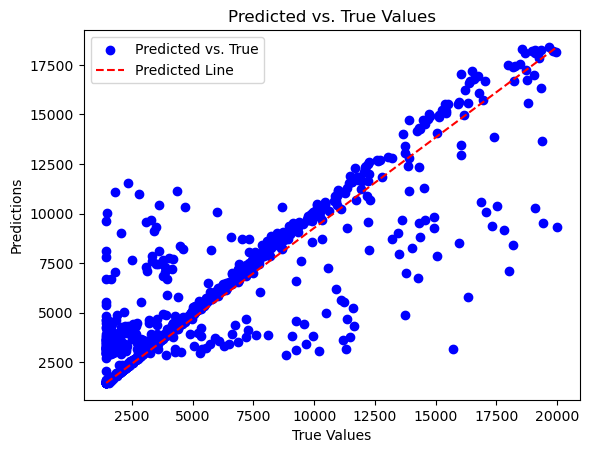

In [42]:
plt.scatter(y_test, predicts, color='blue', label='Predicted vs. True')
plt.plot([min(y_test), max(y_test)], [min(predicts), max(predicts)], color='red', linestyle='--', label='Predicted Line')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs. True Values')
plt.legend()
plt.show()
